# 模型对比

组合方式：
- 1. Base
    - 1.1: default_tree_learner
    - 1.2: default_linear_learner(ridge)
    - 1.3: lasso_learner
    - 1.4: kernel_ridge_learner
    - 1.5: linear_svr_learner
        
- 2. ESN + Base:
    - 2.1 esn_ridge_learner
    - 2.2 esn_kernel_ridge_learner
    - 2.3 esn_linear_svr_learner
    
- 3. NGBoost(Base):
    - model_test(Base)

- 4. NGBoost(ESN + Base):
    - model_test(ESN + Base)

- 5. ESN + NGBoost(Base):
    - esn_model_test(Base)
    
   

- **ridge(alpha=0.01)**
    - **MSE = 0.016642**

- **esn_ridge_learner**
    - n_readout=464
    - n_components=30
    - damping = 0.61758485
    - weight_scaling = 0.94653868
    - **MSE = 0.016483**
    
- **ngboost**
    - **base=ridge(alpha=0.01)**
    - n_estimators=500
    - learning_rate=0.01
    - **MSE = 0.012642**

- **ngboost**
    - **base=esn_ridge_learner**
    - n_estimators=500
    - learning_rate=0.01
    - **MSE = 0.013037**


best alpha: 0.99


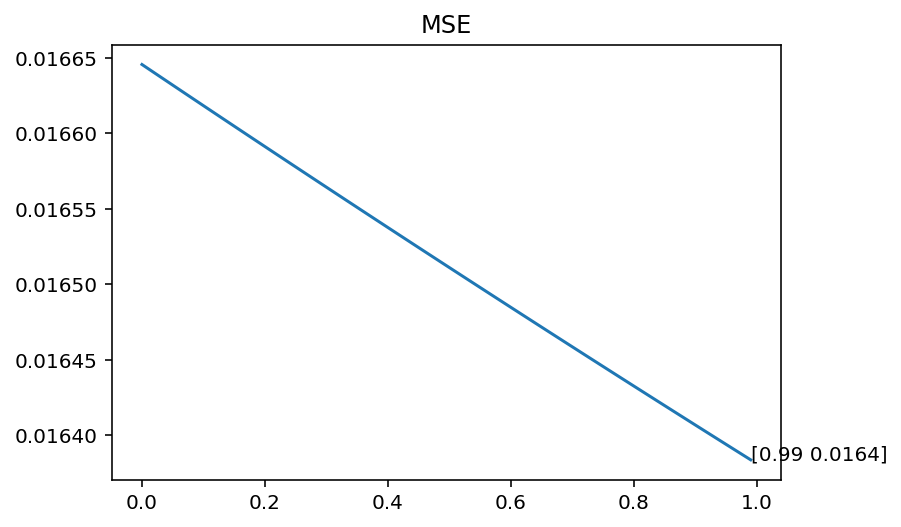

In [5]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
mse_list = []
for alpha in tqdm(np.arange(0,1,0.01)):
    Y_pred = Ridge(alpha=alpha).fit(X_train, Y_train).predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)
Series = pd.Series(mse_list, index=np.arange(0,1,0.01), name='mse')
Series.plot(title='MSE')
show_min = '['+str(Series.idxmin())+' '+str(round(Series.min(), 4))+']'
plt.annotate(show_min,xytext=(Series.idxmin(),Series.min())
             ,xy=(Series.idxmin(),Series.min()))
print('best alpha:', Series.idxmin())

In [2]:
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/module')
from utils import *
from ngboost.learners import *
from sklearn.metrics import mean_squared_error
import numpy as np
from tqdm.notebook import tqdm as tqdm
%config InlineBackend.figure_format='retina'

X_train, X_test, Y_train, Y_test = get_data(hour_num=0, transform='sin+cos',
                                            test_index=[14389, 15389],
                                            drop_time=True, scale=True)

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


get_data(hour_num=0, transform='sin+cos', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'sin(wd)', 'cos(wd)'], dtype='object') 



## ridge(0.01)

In [9]:
from sklearn.linear_model import Ridge

mse_list = []
for i in tqdm(range(100)):
    Y_pred = Ridge(alpha=0.01).fit(X_train, Y_train).predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.01664264688521998


Test MSE: 0.01664264688521998


In [10]:
from sklearn.linear_model import Ridge

mse_list = []
for i in tqdm(range(100)):
    Y_pred = Ridge(alpha=1).fit(X_train, Y_train).predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.01664264688521998


Test MSE: 0.016381212388864117


## esn_ridge_learner

In [14]:
n_readout=464
n_components=30
damping = 0.61758485
weight_scaling = 0.94653868

mse_list = []
for i in tqdm(range(100)):
    esn = esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=0.01).fit(X_train, Y_train)
    Y_pred = esn.predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.0164576028774735


Test MSE: 0.016592028383392875


In [12]:
n_readout=1000
n_components=100
damping = 0.5
weight_scaling = 0.9

mse_list = []
for i in tqdm(range(100)):
    esn = esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=1).fit(X_train, Y_train)
    Y_pred = esn.predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.0164576028774735


Test MSE: 0.01642650566799493


In [13]:
n_readout=8287
n_components=24
damping = 0.66547671
weight_scaling = 0.62731284

mse_list = []
for i in tqdm(range(100)):
    esn = esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=1).fit(X_train, Y_train)
    Y_pred = esn.predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.0164576028774735


Test MSE: 0.01642277660053868


## ngboost( base=ridge(0.01) )

NGBRegressor(Base=Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2827 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3047 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3060 val_loss=0.0000 scale=0.0078 norm=0.0040
[iter 400] loss=-0.3061 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.012642656209642687
Test NLL -0.4731345092118707


0.012642656209642687

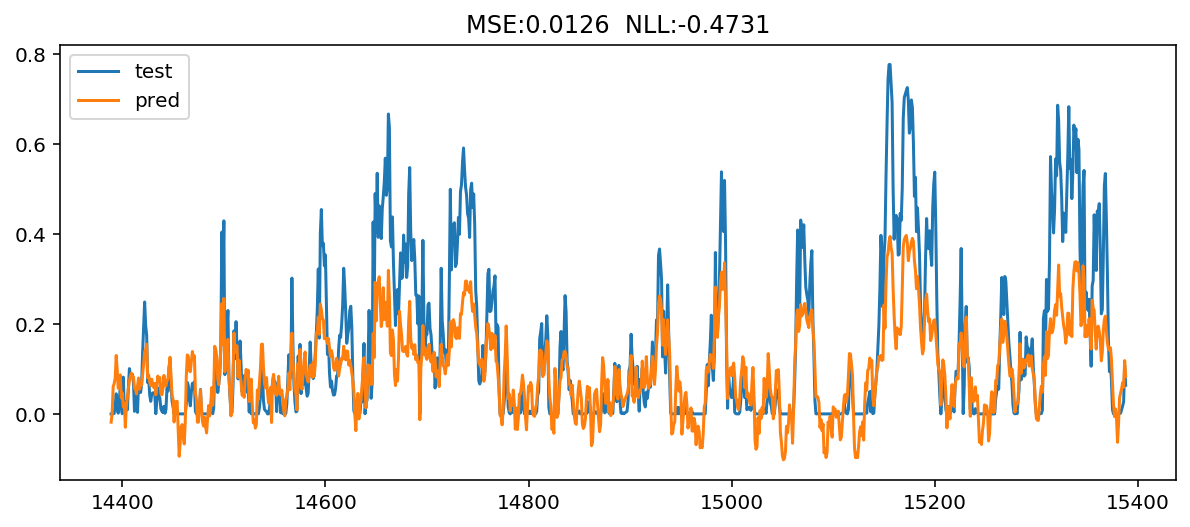

In [15]:
model_test(Base=default_linear_learner(alpha=0.01),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test,
            return_mse=True) # 0.012644396357596153

NGBRegressor(Base=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                        normalize=False, random_state=None, solver='auto',
                        tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2817 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3040 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3053 val_loss=0.0000 scale=0.0078 norm=0.0040
[iter 400] loss=-0.3054 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.012661682696488053
Test NLL -0.47321500949930045


0.012661682696488053

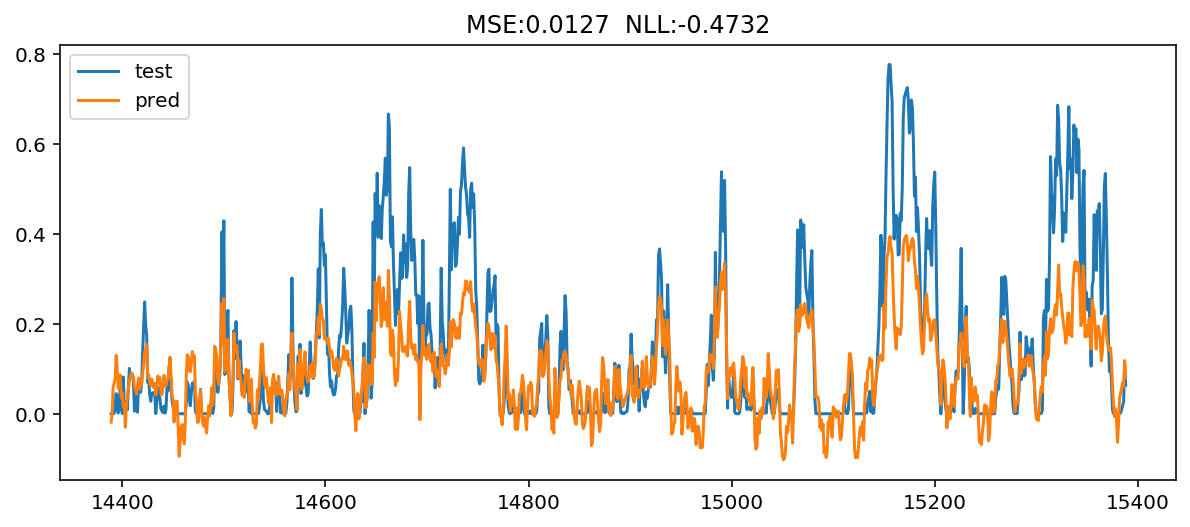

In [6]:
model_test(Base=default_linear_learner(alpha=1),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test,
            return_mse=True) # 0.012644396357596153

## ngboost( base=esn_ridge_learner )

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a205bfb38>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2840 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3070 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3085 val_loss=0.0000 scale=0.0078 norm=0.0040
[iter 400] loss=-0.3086 val_loss=0.0000 scale=0.0001 norm=0.0001

Test MSE 0.013348970882471719
Test NLL -0.46255661189252884


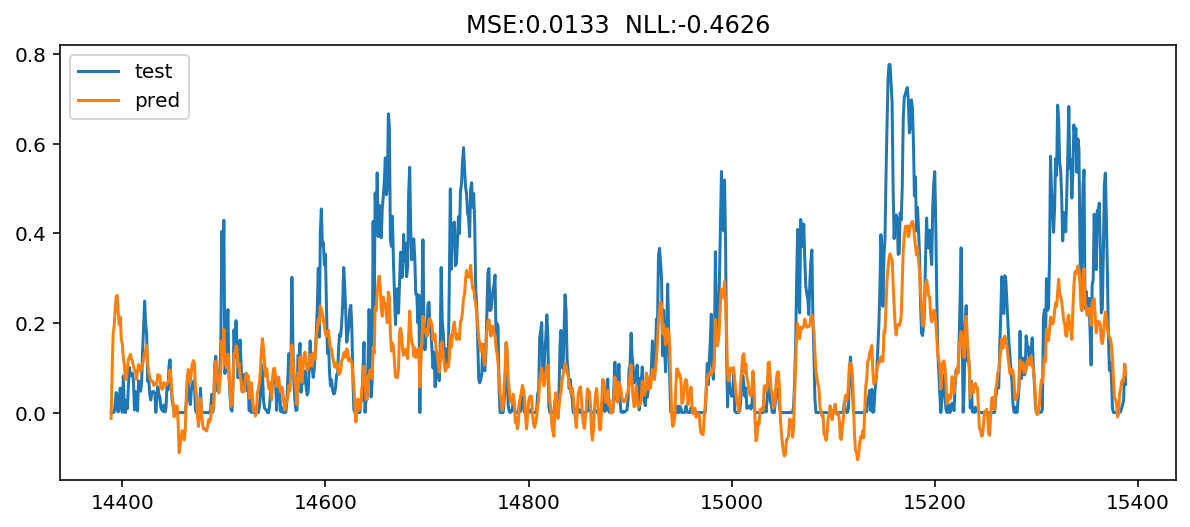

In [7]:
n_readout=464
n_components=30
damping = 0.61758485
weight_scaling = 0.94653868

model_test(Base= esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=1),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test)

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a2064d048>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2834 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3066 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3081 val_loss=0.0000 scale=0.0039 norm=0.0020
[iter 400] loss=-0.3082 val_loss=0.0000 scale=0.0078 norm=0.0040

Test MSE 0.012901196707759521
Test NLL -0.47240527120591047


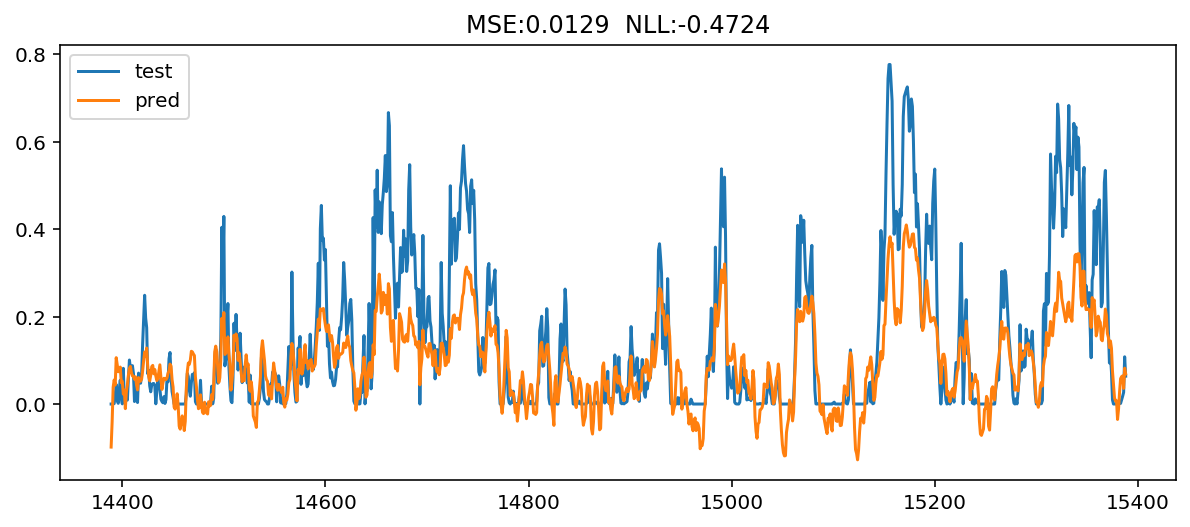

In [16]:
n_readout=8287
n_components=24
damping = 0.66547671
weight_scaling = 0.62731284

model_test(Base= esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=1),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test)

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a203ac390>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2884 val_loss=0.0000 scale=0.1250 norm=0.0629
[iter 200] loss=-0.3094 val_loss=0.0000 scale=0.0312 norm=0.0158
[iter 300] loss=-0.3107 val_loss=0.0000 scale=0.0078 norm=0.0039
[iter 400] loss=-0.3108 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.01247351456307451
Test NLL -0.4740008945758591


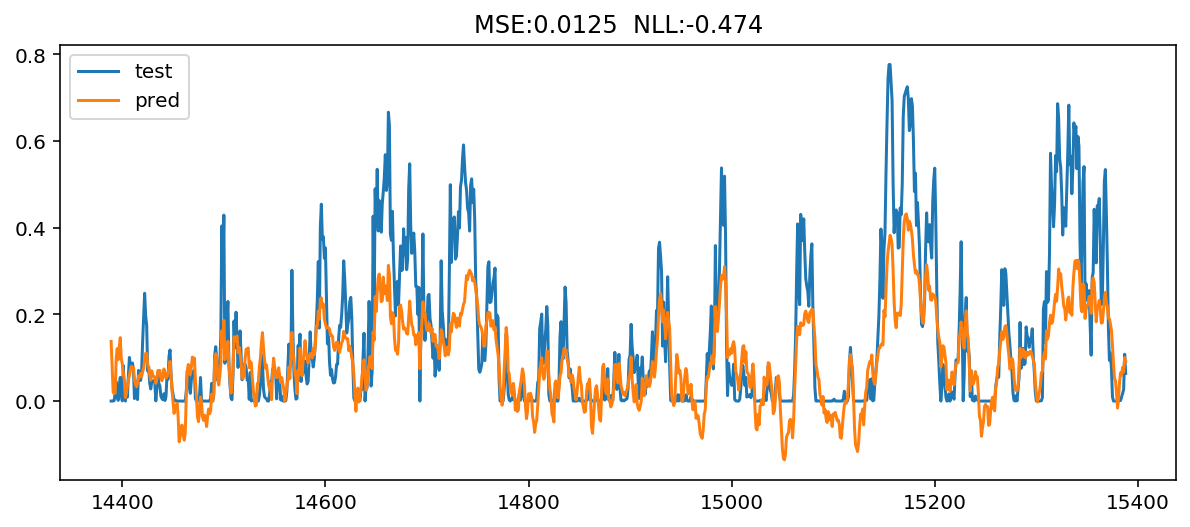

In [17]:
n_readout=1000
n_components=100
damping = 0.5
weight_scaling = 0.9

model_test(Base= esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=1),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test)

In [ ]:
n_readout=464
n_components=30
damping = 0.61758485
weight_scaling = 0.94653868

mse_list = []
for i in tqdm(range(10)):
    mse = model_test(Base= esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping=damping,
                weight_scaling = weight_scaling,
                alpha=0.01),
            n_estimators=500, verbose=False,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test,
            return_mse=True)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list))

## ESN+ngboost(base=ridge)

SimpleESN(damping=0.61758485, discard_steps=0, n_components=30, n_readout=464,
          random_state=RandomState(MT19937) at 0x10F453BA0,
          weight_scaling=0.94653868) 

NGBRegressor(Base=Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.1009 val_loss=0.0000 scale=0.0312 norm=0.0960
[iter 200] loss=0.0983 val_loss=0.0000 scale=0.0039 norm=0.0126
[iter 300] loss=0.0981 val_loss=0.0000 scale=0.0010 norm=0.0032
[iter 400] loss=0.0981 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 9.902831773183621
Test NLL 2.826499068

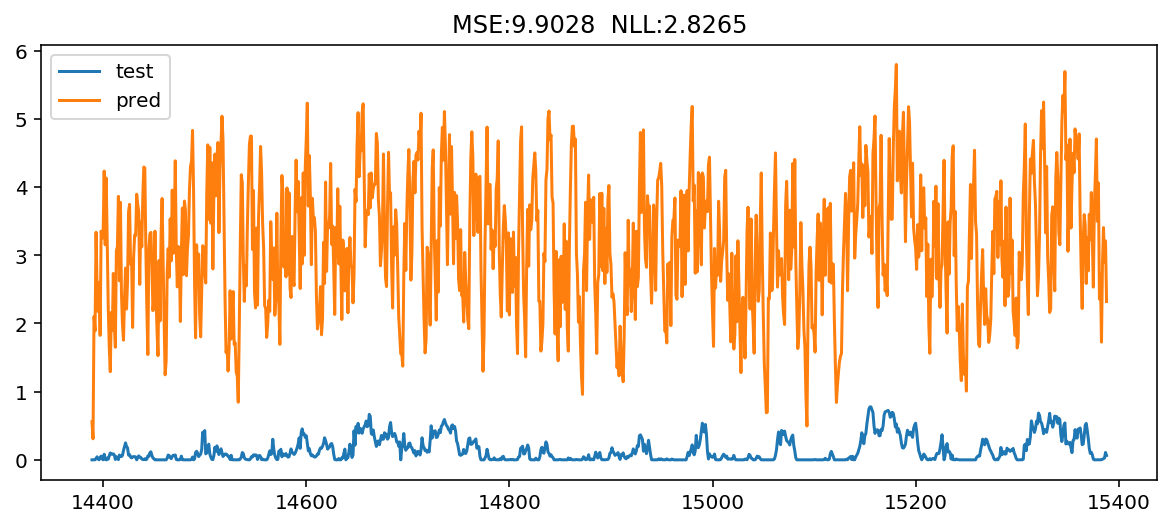

In [2]:
from sklearn.linear_model import Ridge
esn_param = {'n_readout': 464,
             'n_components': 30,
             'damping': 0.61758485,
             'weight_scaling': 0.94653868}
esn_model_test(Base=Ridge(alpha=0.01), 
               esn_param = esn_param,
               n_estimators=500, verbose_eval=100, Score=CRPS,
               X_train=X_train, X_test=X_test,
               Y_train=Y_train, Y_test=Y_test)

SimpleESN(damping=0.66547671, discard_steps=0, n_components=24, n_readout=8287,
          random_state=RandomState(MT19937) at 0x10C9CEBA0,
          weight_scaling=0.62731284) 

NGBRegressor(Base=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                        normalize=False, random_state=None, solver='auto',
                        tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.0991 val_loss=0.0000 scale=0.0156 norm=0.0492
[iter 200] loss=0.0972 val_loss=0.0000 scale=0.0039 norm=0.0128
[iter 300] loss=0.0971 val_loss=0.0000 scale=0.0010 norm=0.0032
[iter 400] loss=0.0970 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.20159886102456356
Test NLL 4.573330529

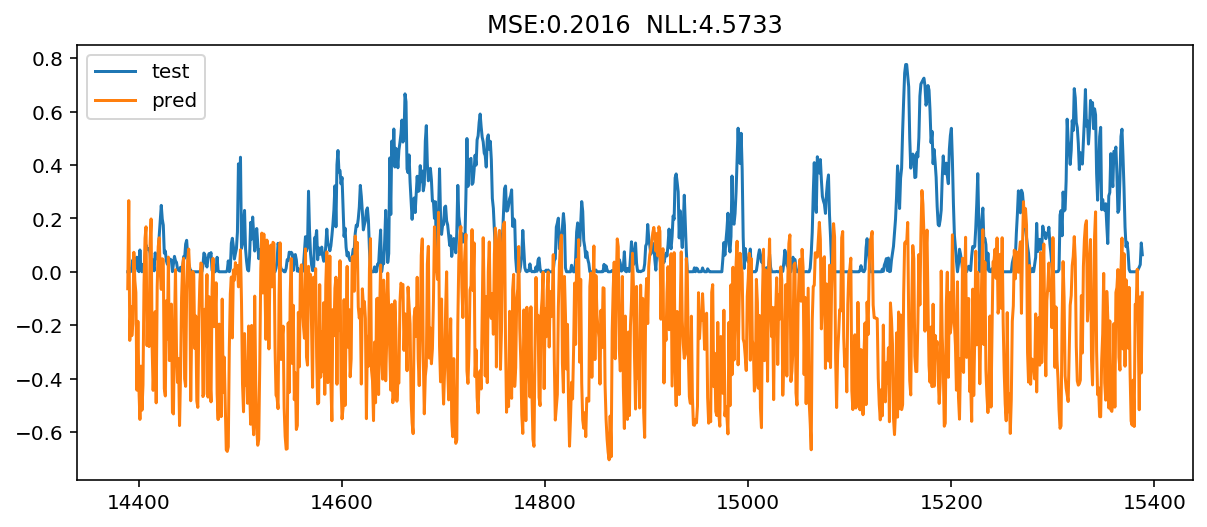

In [18]:
from sklearn.linear_model import Ridge
esn_param = {'n_readout': 8287,
             'n_components': 24,
             'damping': 0.66547671,
             'weight_scaling': 0.62731284}
esn_model_test(Base=Ridge(alpha=1), 
               esn_param = esn_param,
               n_estimators=500, verbose_eval=100, Score=CRPS,
               X_train=X_train, X_test=X_test,
               Y_train=Y_train, Y_test=Y_test)

SimpleESN(damping=0.5, discard_steps=0, n_components=100, n_readout=1000,
          random_state=RandomState(MT19937) at 0x10C9CEBA0, weight_scaling=0.9) 

NGBRegressor(Base=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                        normalize=False, random_state=None, solver='auto',
                        tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.0995 val_loss=0.0000 scale=0.0156 norm=0.0489
[iter 200] loss=0.0974 val_loss=0.0000 scale=0.0039 norm=0.0127
[iter 300] loss=0.0973 val_loss=0.0000 scale=0.0010 norm=0.0032
[iter 400] loss=0.0973 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.14218040349802746
Test NLL 1.6897657329834805


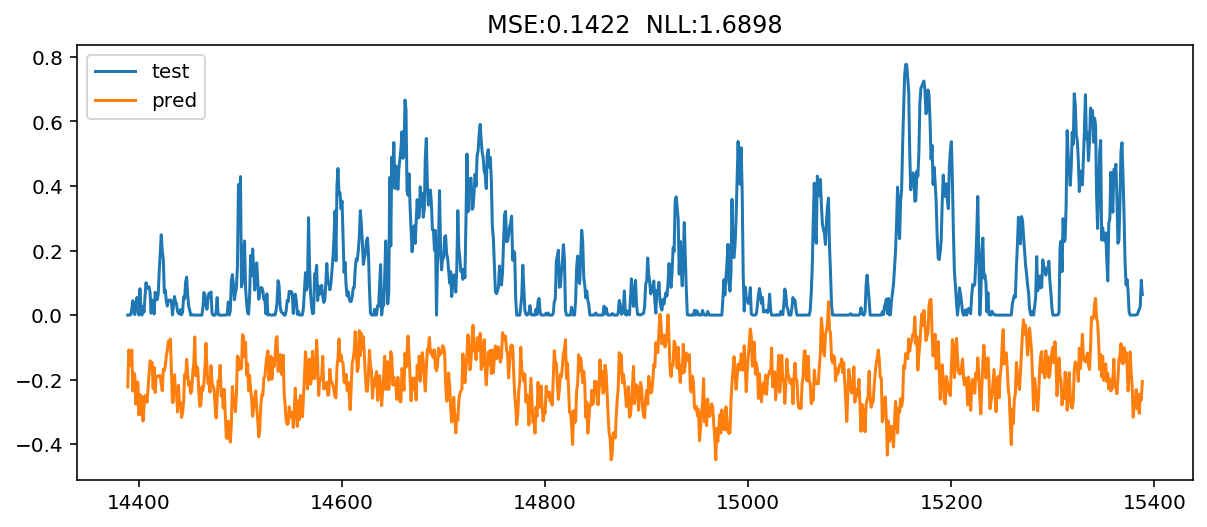

In [19]:
from sklearn.linear_model import Ridge
esn_param = {'n_readout': 1000,
             'n_components': 100,
             'damping': 0.5,
             'weight_scaling': 0.9}
esn_model_test(Base=Ridge(alpha=1), 
               esn_param = esn_param,
               n_estimators=500, verbose_eval=100, Score=CRPS,
               X_train=X_train, X_test=X_test,
               Y_train=Y_train, Y_test=Y_test)